Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from os import walk

In [5]:
base_dir = 'C:\\Users\\ricar\\OneDrive\\Escritorio'
model = models.load_model(base_dir + "\\ModeloGuardadoCategorical.h5")


In [13]:
queries_dir = os.path.join(base_dir,'Queries')
batch_size = 6

queries_ds = ImageDataGenerator(
    rescale = 1./255,
    )


queries_generator = queries_ds.flow_from_directory(
    queries_dir,
    target_size = (150,150),
    batch_size = batch_size,
    class_mode = 'categorical'
)


NameError: name 'os' is not defined

In [7]:
queries_imgs = queries_generator[0][0]
queries_labels = queries_generator[0][1]

predict = model.predict(queries_generator)
print(predict)

classes_x = np.argmax(predict,axis=1)
print(classes_x)
queries_labels_y = np.argmax(queries_labels, axis=1)
#print(queries_labels)

NameError: name 'queries_generator' is not defined

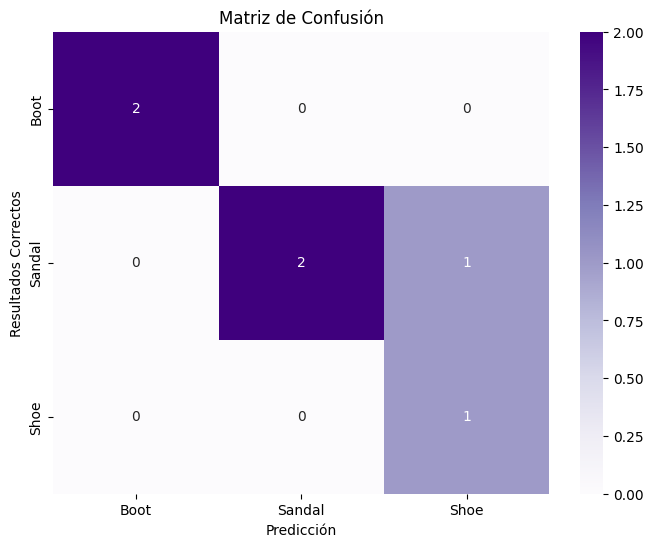

In [ ]:
from tensorflow.math import confusion_matrix
import seaborn as sns

class_names = ['Boot', 'Sandal', 'Shoe']

mat = confusion_matrix(classes_x, queries_labels_y)

plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Purples", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicción')
plt.ylabel('Resultados Correctos')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
def plot_image(i, predict_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predict_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predict_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predict_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(3))
  plt.yticks([])
  thisplot = plt.bar(range(3), predict_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predict_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

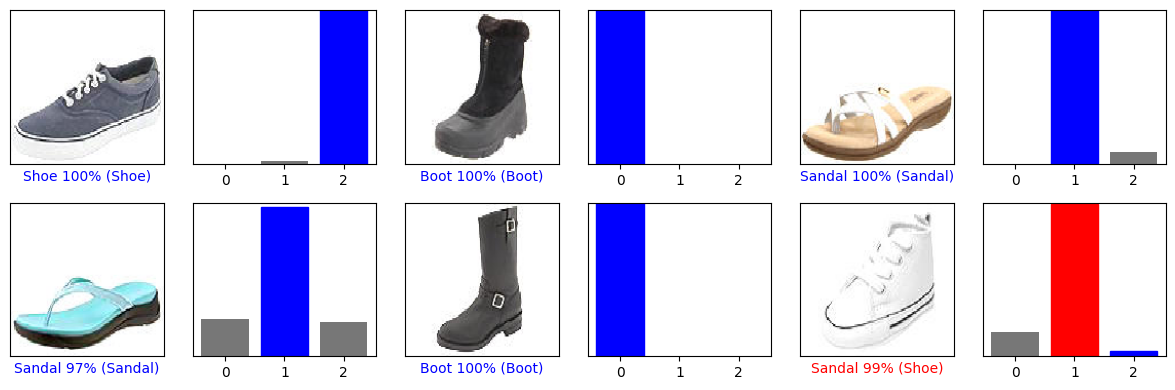

In [ ]:
numRows = 2
numCols = 3
num_images = numRows*numCols
plt.figure(figsize=(2*2*numCols, 2*numRows))
for i in range(num_images):
  plt.subplot(numRows, 2*numCols, 2*i+1)
  plot_image(i, predict[i], queries_labels_y, queries_imgs)
  plt.subplot(numRows, 2*numCols, 2*i+2)
  plot_value_array(i, predict[i], queries_labels_y)
plt.tight_layout()
plt.show()